Question 2.1

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [66]:
# Adjacency matrix, A, of the graph.
A = np.array([[0,1,1,0,0],[1,0,1,0,0],[1,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]])
# Diagonal matrix, D, of the adjacency matrix.
D = np.array([[2,0,0,0,0],[0,2,0,0,0],[0,0,2,0,0],[0,0,0,1,0],[0,0,0,0,1]])
# Graph Laplacian, L. 
L = D - A
print("Graph Laplacian matrix: ")
print(L)

Graph Laplacian matrix: 
[[ 2 -1 -1  0  0]
 [-1  2 -1  0  0]
 [-1 -1  2  0  0]
 [ 0  0  0  1 -1]
 [ 0  0  0 -1  1]]


In [67]:
eigvals, eigvecs = la.eig(L)
print("Eigenvalues: ")
print(eigvals.real)
print("Eigenvectors: ")
print(eigvecs)

Eigenvalues: 
[ 3.0000000e+00 -4.4408921e-16  3.0000000e+00  2.0000000e+00
  0.0000000e+00]
Eigenvectors: 
[[ 0.81649658 -0.57735027  0.29329423  0.          0.        ]
 [-0.40824829 -0.57735027 -0.80655913  0.          0.        ]
 [-0.40824829 -0.57735027  0.5132649   0.          0.        ]
 [ 0.          0.          0.          0.70710678  0.70710678]
 [ 0.          0.          0.         -0.70710678  0.70710678]]


Question 2.2

In [68]:
# test-football.py demo code, modified

import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
import scipy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


def output_file(a, idx2name, c_idx):
    dirpath = os.getcwd()
    node_file = dirpath + '//nodes.csv'
    edge_file = dirpath + '//edges.csv'

    with open(edge_file, 'w') as fid:
        fid.write('Source\tTarget\n')
        for i in range(len(a)):
            fid.write(f'{a[i,0]}\t{a[i,1]}\n')

    with open(node_file, 'w') as fid:
        fid.write('Id\tLabel\tColor\n')
        for i in range(len(idx2name)):
            fid.write(f'{i}\t{idx2name[i]}\t{c_idx[i]}\n')


def read_team_name():
    # read inverse_teams.txt file
    f_path = abspath("inverse_teams.txt")
    idx2name = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                name = line.split("\t", 1)[1]
                idx2name.append(name[:-1])
    return idx2name


def import_graph():
    # read the graph from 'play_graph.txt'
    f_path = abspath("play_graph.txt")
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)



# spectral clustering
n = 321
k = 13

def spectral_clustering(k, plots=False):

    # load the graph
    a = import_graph()

    i = a[:, 0]-1
    j = a[:, 1]-1
    v = np.ones((a.shape[0], 1)).flatten()

    A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
    A = (A + np.transpose(A))/2
    A = sparse.csc_matrix.todense(A) # ## convert to dense matrix

    D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
    L = D @ A @ D
    L = np.array(L) # ## covert to array

    # v, x = np.linalg.eig(L)
    # x = x[:, 0:k].real

    # eigendecompoosition
    v, x = np.linalg.eig(L)
    x = x[:, 0:k].real
    idx_sorted = np.argsort(v) # the index of eigenvalue sorted acsending

    # plot the eigenvalues from largest to smallest
    if plots:
        eigvals_sorted = np.sort(v.real)
        eigvals_desc = eigvals_sorted[::-1]
        plt.plot(eigvals_desc,'r:')
        # plt.axis([280,350,0,1.2])
        plt.show()

    x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors

    x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

    # scatter
    if plots:
        plt.scatter(x[:, 0], x[:, 1])
        plt.show()

    # k-means
    kmeans = KMeans(n_clusters=k).fit(x)
    c_idx = kmeans.labels_

    # show cluster
    idx2name = read_team_name()
    for i in range(k):
        print(f'Cluster {i+1}\n***************')
        idx = [index for index, t in enumerate(c_idx) if t == i]
        count = 0
        for index in idx:
            count += 1
            print(idx2name[index])
        print("\n Cluster Count: " + str(count))
        print('\n')

    # output file
    output_file(a, idx2name, c_idx)

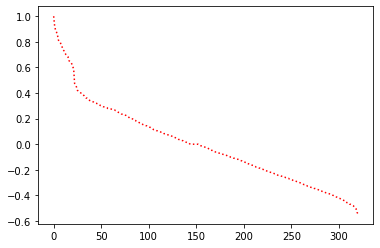

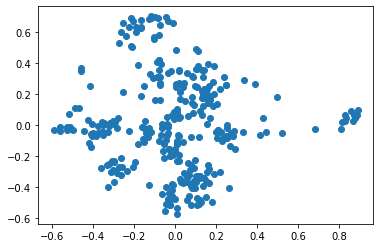

Cluster 1
***************
Utah
Boise St.
San Jose St.
Washington St.
Arizona St.
BYU
Colorado St.
Colorado
UNLV
Arizona
UCLA
Air Force
Nevada
California
Stanford
Oregon St.
Wyoming
San Diego St.
Fresno St.
USC
New Mexico
Oregon
Washington
Hawaii
Utah St.

 Cluster Count: 25


Cluster 2
***************
E. Washington
Missouri St.
Idaho State
W. Illinois
S. Illinois
Cal-Poly
North Dakota
Weber St.
N. Iowa
N. Dakota St.
Youngstown St.
Indiana St.
So. Utah
South Dakota St.
UC-Davis
Portland St.
Montana
Montana St.
Sacramento St.
N. Arizona
Montana-Western
South Dakota
William Penn
Central Washington
Illinois St.
Fort Lewis
Black Hills State
N. Colorado
Western Oregon
Chadron State
New Mexico Highlands
Menlo
Wisconsin-Oshkosh

 Cluster Count: 33


Cluster 3
***************
Georgia State
Texas A&M
South Carolina
La.-Monroe
Ole Miss
New Mexico St.
Vanderbilt
W. Kentucky
Texas-San Antonio
Troy
UAB
Appalachian St.
Kentucky
Ga. Southern
FAU
Old Dominion
Missouri
Marshall
Rice
Alabama
Arkansas
Aub

In [69]:
k = 13
spectral_clustering(k, True)

Question 2.3

In [70]:
k = 5
spectral_clustering(k)

Cluster 1
***************
E. Illinois
Chattanooga
Charlotte
Campbell
Reinhardt
Mercer
E. Kentucky
Point U
Charleston So.
Missouri Baptist
SE Missouri St.
Valparaiso
W. Illinois
Kentucky Chr.
Tenn. Tech
Taylor
S. Illinois
Union College (KY)
Murray St.
Jacksonville St.
UT Martin
Youngstown St.
Indiana St.
Wofford
VMI
The Citadel
Morehead St.
Marist
Samford
Austin Peay
Stetson
Warner
W. Carolina
Edward Waters
Tennessee St.
Gardner-Webb
Furman
Grand View U.
Drake
College of Faith
Davidson
Jacksonville
Johnson C. Smith
Dayton
Brevard College
Newberry
Pikeville College
Butler
Wittenberg
Florida Tech
Truman State
Catawba
Illinois St.
St. Joseph's (IN)
Western New Mexico
San Diego
Cumberland (TN)
N. Greenville
Birmingham-Southern
William Jewell
West Alabama
Ave Maria
Virginia-Wise
Limestone College
Kentucky Wesleyan
Wesley

 Cluster Count: 66


Cluster 2
***************
Georgia State
Texas A&M
South Carolina
Minnesota
Presbyterian
Northern Illinois
Wake Forest
La.-Monroe
C. Michigan
Akron
Ole 

In [71]:
k = 7
spectral_clustering(k)

Cluster 1
***************
Campbell
Reinhardt
Mercer
Missouri Baptist
Valparaiso
Taylor
Morehead St.
Marist
Stetson
Warner
Grand View U.
Drake
College of Faith
Davidson
Jacksonville
Dayton
Pikeville College
Butler
Wittenberg
Florida Tech
Truman State
Catawba
St. Joseph's (IN)
Western New Mexico
San Diego
Birmingham-Southern
William Jewell
Limestone College

 Cluster Count: 28


Cluster 2
***************
Bryant
Stony Brook
Robert Morris
Villanova
Delaware
Wagner
Georgetown
Monmouth
Colgate
James Madison
Duquesne
William & Mary
Elon
Bucknell
Holy Cross
Albany
Central Conn. St.
Towson
Richmond
Maine
Sacred Heart
St. Francis
Fordham
New Hampshire
Lehigh
Clarion
Merrimack
Lafayette
Rhode Island
American International
Assumption
Harvard
Yale
Brown
Columbia
Cornell
Penn
Princeton
Dartmouth
West Liberty State
Alderson Broaddus

 Cluster Count: 41


Cluster 3
***************
Georgia State
Texas A&M
South Carolina
Minnesota
Northern Illinois
Wake Forest
La.-Monroe
C. Michigan
Akron
Ole Miss
Tulan

In [72]:
k = 10
spectral_clustering(k)

Cluster 1
***************
Sam Houston St.
E. Washington
Abil Chr.
Northwestern St.
Idaho State
Cal-Poly
North Dakota
Weber St.
Nicholls St.
So. Utah
UC-Davis
Portland St.
Montana
Montana St.
Sacramento St.
Incarnate Word
N. Arizona
Cent. Arkansas
S.F. Austin
Lamar
SE Louisiana
Montana-Western
Texas College
McNeese St.
Central Washington
McMurry University
Houston Baptist
Fort Lewis
Black Hills State
N. Colorado
Western Oregon
Chadron State
New Mexico Highlands
Henderson State
Texas A&M-Commerce
CSU-Pueblo
Menlo
Mississippi College
Arkansas Tech

 Cluster Count: 39


Cluster 2
***************
Minnesota
Northern Illinois
C. Michigan
Akron
Tulane
Tulsa
Rutgers
Temple
Connecticut
Michigan St.
Bowling Green
W. Kentucky
Texas-San Antonio
Houston
Penn St.
UCF
W. Michigan
Purdue
Iowa
Ohio St.
Michigan
Iowa St.
Illinois
Indiana
Ball St.
Massachusetts
Northwestern
FAU
Nebraska
Old Dominion
Marshall
Miami (Ohio)
Maryland
Rice
Buffalo
West Virginia
E. Michigan
Ohio
Kent St.
TCU
Memphis
Louisiana T

In [73]:
k = 21
spectral_clustering(k)

Cluster 1
***************
Northern Illinois
C. Michigan
Akron
Bowling Green
W. Michigan
Ball St.
Massachusetts
Miami (Ohio)
Buffalo
E. Michigan
Ohio
Kent St.
Toledo
Army

 Cluster Count: 14


Cluster 2
***************
Stony Brook
Charlotte
Villanova
Delaware
James Madison
William & Mary
Elon
Albany
Towson
Richmond
Maine
New Hampshire
Johnson C. Smith
Rhode Island
American International
Wesley

 Cluster Count: 16


Cluster 3
***************
E. Washington
Idaho State
Cal-Poly
North Dakota
Weber St.
So. Utah
UC-Davis
Portland St.
Montana
Montana St.
Sacramento St.
N. Arizona
Montana-Western
Central Washington
Fort Lewis
Black Hills State
N. Colorado
Western Oregon
Chadron State
New Mexico Highlands
Menlo

 Cluster Count: 21


Cluster 4
***************
Virginia-Lynchburg
Alcorn St.
Faith U.
Mississippi Valley St.
Southern
Ark.-Pine Bluff
Jackson St.
Alabama St.
Grambling
Alabama A&M
Prairie View A&M
Texas Southern
Tuskegee
Central Methodist
Louisiana College
Central State (Ohio)

 Cluster 

Question 2.4

In [74]:
k = 10
spectral_clustering(k)

Cluster 1
***************
Bryant
Robert Morris
Villanova
Wagner
Georgetown
Colgate
Duquesne
Bucknell
Holy Cross
Albany
Central Conn. St.
Sacred Heart
St. Francis
Fordham
New Hampshire
Lehigh
Clarion
Merrimack
Lafayette
Rhode Island
Assumption
Harvard
Yale
Brown
Columbia
Cornell
Penn
Princeton
Dartmouth
West Liberty State
Alderson Broaddus

 Cluster Count: 31


Cluster 2
***************
Minnesota
Northern Illinois
C. Michigan
Akron
Tulane
Tulsa
Rutgers
Temple
Connecticut
Michigan St.
Bowling Green
W. Kentucky
Texas-San Antonio
Houston
Penn St.
UCF
Pittsburgh
W. Michigan
Purdue
Iowa
Ohio St.
UAB
Michigan
Iowa St.
Illinois
Indiana
Ball St.
Massachusetts
Northwestern
FAU
Nebraska
Old Dominion
Marshall
Miami (Ohio)
Maryland
Rice
Buffalo
West Virginia
E. Michigan
Ohio
Kent St.
TCU
Memphis
Louisiana Tech
Oklahoma
FIU
South Florida
M. Tenn. St.
Texas Tech
Toledo
Kansas St.
Southern Miss
UTEP
North Texas
Texas
Oklahoma St.
East Carolina
Wisconsin
SMU
Baylor
Army
Kansas
Cincinnati

 Cluster Coun

In [75]:
k = 10
spectral_clustering(k)

Cluster 1
***************
Sam Houston St.
E. Washington
Abil Chr.
Northwestern St.
Idaho State
Cal-Poly
North Dakota
Weber St.
Nicholls St.
So. Utah
UC-Davis
Portland St.
Montana
Montana St.
Sacramento St.
Incarnate Word
N. Arizona
Cent. Arkansas
S.F. Austin
Lamar
SE Louisiana
Montana-Western
Texas College
McNeese St.
Central Washington
McMurry University
Houston Baptist
Fort Lewis
Black Hills State
N. Colorado
Western Oregon
Chadron State
New Mexico Highlands
Henderson State
Texas A&M-Commerce
CSU-Pueblo
Menlo
Mississippi College
Arkansas Tech

 Cluster Count: 39


Cluster 2
***************
Minnesota
Northern Illinois
C. Michigan
Akron
Tulane
Tulsa
Rutgers
Temple
Connecticut
Michigan St.
Bowling Green
W. Kentucky
Texas-San Antonio
Houston
Penn St.
UCF
W. Michigan
Purdue
Iowa
Ohio St.
UAB
Michigan
Iowa St.
Illinois
Indiana
Ball St.
Massachusetts
Northwestern
FAU
Nebraska
Old Dominion
Marshall
Miami (Ohio)
Maryland
Rice
Buffalo
West Virginia
E. Michigan
Ohio
Kent St.
TCU
Memphis
Louisia

In [76]:
k = 10
spectral_clustering(k)

Cluster 1
***************
E. Illinois
Minnesota
Northern Illinois
Missouri St.
C. Michigan
Akron
E. Kentucky
SE Missouri St.
W. Illinois
Kentucky Chr.
Tenn. Tech
S. Illinois
Union College (KY)
Murray St.
Rutgers
Jacksonville St.
Michigan St.
Bowling Green
Penn St.
W. Michigan
Purdue
N. Iowa
Iowa
Ohio St.
Michigan
UT Martin
N. Dakota St.
Youngstown St.
Illinois
Indiana St.
Indiana
Ball St.
Massachusetts
Northwestern
Nebraska
South Dakota St.
Miami (Ohio)
Maryland
Buffalo
E. Michigan
Ohio
Kent St.
Austin Peay
Edward Waters
Tennessee St.
Toledo
Wisconsin
South Dakota
William Penn
Illinois St.
Cumberland (TN)
West Alabama
Wisconsin-Oshkosh
Kentucky Wesleyan

 Cluster Count: 54


Cluster 2
***************
Bryant
Robert Morris
Villanova
Wagner
Georgetown
Colgate
Duquesne
Bucknell
Holy Cross
Albany
Central Conn. St.
Sacred Heart
St. Francis
Fordham
New Hampshire
Lehigh
Clarion
Merrimack
Lafayette
Rhode Island
Assumption
Harvard
Yale
Brown
Columbia
Cornell
Penn
Princeton
Dartmouth
West Liberty